# Table of Contents
 <p><div class="lev1"><a href="#Compare-Stochastic-learning-strategies-for-MLPClassifier">Compare Stochastic learning strategies for MLPClassifier</a></div>

In [18]:
%matplotlib inline


# Compare Stochastic learning strategies for MLPClassifier


This example visualizes some training loss curves for different stochastic
learning strategies, including SGD and Adam. Because of time-constraints, we
use several small datasets, for which L-BFGS might be more suitable. The
general trend shown in these examples seems to carry over to larger datasets,
however.

Note that those results can be highly dependent on the value of
``learning_rate_init``.


In [101]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [
    {
        'solver': 'sgd', 
        'learning_rate': 
        'constant', 
        'momentum': 0,
        'learning_rate_init': 0.2
    },
    {
        'solver': 'sgd', 
        'learning_rate': 
        'constant', 
        'momentum': .9,
        'nesterovs_momentum': False, 
        'learning_rate_init': 0.2
    },
    {
        'solver': 'sgd', 
        'learning_rate': 
        'constant', 
        'momentum': .9,
        'nesterovs_momentum': True, 
        'learning_rate_init': 0.2
    },
    {
        'solver': 'sgd', 
        'learning_rate': 
        'invscaling', 
        'momentum': 0,
        'learning_rate_init': 0.2
    },
    {
        'solver': 'sgd', 
        'learning_rate': 'invscaling', 
        'momentum': .9,
        'nesterovs_momentum': True, 
        'learning_rate_init': 0.2
    },
    {
        'solver': 'sgd', 
        'learning_rate': 'invscaling', 
        'momentum': .9,
        'nesterovs_momentum': False, 
        'learning_rate_init': 0.2
    },
    {
        'solver': 'adam', 
        'learning_rate_init': 0.01
    }
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam"
]


plot_args = [
    {
        'c': 'red', 
        'linestyle': '-'
    },
    {
        'c': 'green',
        'linestyle': '-'
    },

    {
        'c': 'blue',
        'linestyle': '-'
    },

    {
        'c': 'red', 
        'linestyle': '--'
    },

    {
        'c': 'green',
        'linestyle': '--'
    },

    {
        'c': 'blue',
        'linestyle': '--'
    },

    {
        'c': 'black',
        'linestyle': '-'
    }
]

Automatically created module for IPython interactive environment


In [144]:

def plot_on_dataset(X, y, ax, name):
      
    # for each dataset, plot learning for each learning strategy
#     print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
#         print("training: %s" % label)
#         print(param)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
#         print("Training set score: %f" % mlp.score(X, y))
#         print("Training set loss: %f" % mlp.loss_)
#     for mlp, label, args in zip(mlps, labels, plot_args):
#             ax.plot(mlp.loss_curve_, label=label, **args)
    return mlps

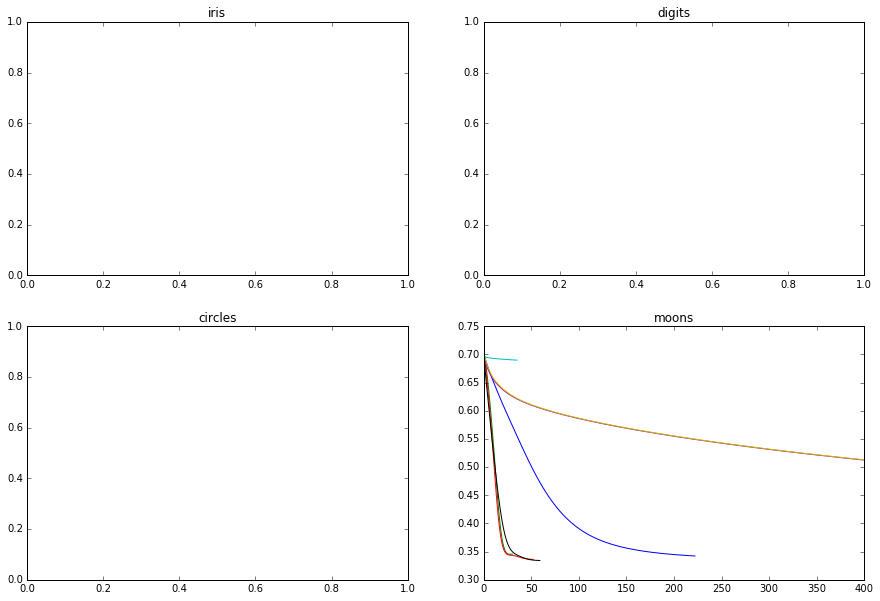

In [150]:


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(iris.data, iris.target),
             (digits.data, digits.target),
             datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    
    mlps = plot_on_dataset(*data, ax=ax, name=name)
    
# fig.legend(ax.get_lines(), labels=labels, ncol=3, loc="upper center")
# plt.show()
del fig 
del axes
plt.figure(1)
for m in mlps:
    plt.plot(m.loss_curve_)
# print(mlps[0].loss_curve_)
plt.show()

In [42]:
import numpy as np
tmpdata = [(1, 2, 3), ('a', 'b', 'c')]

In [48]:
tmpdata

[(1, 2, 3), ('a', 'b', 'c')]

In [54]:
def tmpfun(x, y):
    print(x)
    print(y)

tmpfun(*tmpdata)

(1, 2, 3)
('a', 'b', 'c')


In [56]:
def printdict(**kwargs):
    print repr(kwargs)

printdict(john=10, jill=12, david=15)

{'john': 10, 'jill': 12, 'david': 15}


In [60]:
t = [('solver', 'sgd'), ('learning_rate', 'constant'), ('momentum', '0.0'), ('learning_rate_init', '0.2'), ('label', '"constant learning-rate"')]


In [67]:
t

[('solver', 'sgd'),
 ('learning_rate', 'constant'),
 ('momentum', '0.0'),
 ('learning_rate_init', '0.2'),
 ('label', '"constant learning-rate"')]

In [79]:
for tu in t:
    print tu[0]

solver
learning_rate
momentum
learning_rate_init
label


In [80]:
params = {
            'a1': {
                'solver': 'sgd',
                'learning_rate': 'constant',
                'momentum': 0.0,
                'learning_rate_init': 0.2
            },
            'b': {
                'solver': 'sgd',
                'learning_rate': 'constant',
                'momentum': 0.9,
                'nesterovs_momentum': False,
                'learning_rate_init': 0.2
            }}

In [77]:
params['a1']

{'learning_rate': 'constant',
 'learning_rate_init': 0.2,
 'momentum': 0.0,
 'solver': 'sgd'}

In [82]:
b = {'solver_4': {'learning_rate': 'invscaling', 'label': '"inv-scaling learning-rate"', 'learning_rate_init': '0.2', 'momentum': '0.0', 'solver': 'sgd'}, 'solver_5': {'nesterovs_momentum': 'True,', 'solver': 'sgd', 'learning_rate': 'invscaling', 'label': '"inv-scaling with momentum"', 'momentum': '0.9', 'learning_rate_init': '0.2'}, 'solver_6': {'nesterovs_momentum': 'False,', 'solver': 'sgd', 'learning_rate': 'invscaling', 'label': '"inv-scaling with Nesterov\'s momentum"', 'momentum': '.9', 'learning_rate_init': '0.2'}, 'solver_7': {'label': '"adam"', 'learning_rate_init': '0.1', 'solver': 'adam'}, 'solver_1': {'learning_rate': 'constant', 'label': '"constant learning-rate"', 'learning_rate_init': '0.2', 'momentum': '0.0', 'solver': 'sgd'}, 'solver_2': {'nesterovs_momentum': 'False,', 'solver': 'sgd', 'learning_rate': 'constant', 'label': '"constant with momentum"', 'momentum': '0.9', 'learning_rate_init': '0.2'}, 'solver_3': {'nesterovs_momentum': 'True,', 'solver': 'sgd', 'learning_rate': 'constant', 'label': '"constant with Nesterov\'s momentum"', 'momentum': '0.9', 'learning_rate_init': '0.2'}}

In [113]:
del b['solver_4']['label']

In [115]:
b['solver_4_int']

{'learning_rate': 'invscaling',
 'learning_rate_init': '0.2',
 'momentum': '0.0',
 'solver': 'sgd'}

In [116]:
a = 'solver_4_int'
a[:-4]

'solver_4'

In [117]:
a = '4.0'
float(a)

4.0

In [120]:
a =1 
a==1 

True

In [128]:
a ='False'

In [129]:
a == 'True'

False

In [126]:
bool(a)

True

In [ ]:
{'solver_4': {'learning_rate': 'invscaling', 'label': 'inv-scaling learning-rate', 'learning_rate_init': 0.2, 'momentum': 0.0, 'solver': 'sgd'}, 'solver_5': {'nesterovs_momentum': False, 'solver': 'sgd', 'learning_rate': 'invscaling', 'label': 'inv-scaling with momentum', 'momentum': 0.9, 'learning_rate_init': 0.2}, 'solver_6': {'nesterovs_momentum': False, 'solver': 'sgd', 'learning_rate': 'invscaling', 'label': "inv-scaling with Nesterov's momentum", 'momentum': 0.9, 'learning_rate_init': 0.2}, 'solver_7': {'label': 'adam', 'learning_rate_init': 0.1, 'solver': 'adam'}, 'solver_1': {'learning_rate': 'constant', 'label': 'constant learning-rate', 'learning_rate_init': 0.2, 'momentum': 0.0, 'solver': 'sgd'}, 'solver_2': {'nesterovs_momentum': False, 'solver': 'sgd', 'learning_rate': 'constant', 'label': 'constant with momentum', 'momentum': 0.9, 'learning_rate_init': 0.2}, 'solver_3': {'nesterovs_momentum': False, 'solver': 'sgd', 'learning_rate': 'constant', 'label': "constant with Nesterov's momentum", 'momentum': 0.9, 'learning_rate_init': 0.2}}
{'learning_rate': 'invscaling', 'learning_rate_init': 0.2, 'momentum': 0.0, 'solver': 'sgd'}


In [133]:
7.0 % 2.0

1.0